# Graphviz with Python

Graphviz is a set of domain specific languages for graphs. I am yet unsure what exactly is meant by the term *graph* here, does it mean $G = \langle N, E\rangle$ where $N$ is a set of nodes, and $E$ is a set of edges $\lbrace \langle n_{source}, n_{target} \rangle | n_{source}, n_{target} \in N \rbrace$, or graphical things in general.

At the core is the domain specific [DOT language](https://en.wikipedia.org/wiki/DOT_(graph_description_language), and then there is [Graphviz software](https://graphviz.gitlab.io) itself which process DOT.

* `dot`: a command-line tool to produce layered drawings of directed graphs in a variety of output formats (PostScript, PDF, SVG, annotated text and so on).
* `neato`: for "spring model" layout (in Mac OS version called "energy minimised")
* `sfdp`: a layout engine for undirected graphs that scales to very large graphs.
* `fdp`: another layout engine for undirected graphs.
* `twopi`: for radial graph layouts.
* `circo`: for circular graph layouts.
* `dotty`: a graphical user interface to visualize and edit graphs.
* `lefty`: a programmable (in a language inspired by EZ) widget that displays DOT graphs and allows the user to perform actions on them with the mouse. Lefty can therefore be used as the view in a model-view-controller GUI application that uses graphs. 

There is a 40 page PDF manual Gansner, Koutsofios and North [*Drawing graphs with* dot](https://graphviz.gitlab.io/_pages/pdf/dotguide.pdf) (2015) and other guides at [Graphviz documentation page](https://graphviz.gitlab.io/documentation/).

A couple of Python libraries exist, one of them is `pygraphviz` which I hope is the one I want to use.

There is also a [web interface called Webgraphviz](http://www.webgraphviz.com/), which might be helpful for sketching.

In [1]:
import pygraphviz as pgv

## A simple graph

The `pygraphviz.AGraph` class is a start

In [2]:
d = {'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'2': None}}
A = pgv.AGraph(d)
A.add_node('kitten')
A.add_edge('2', 'kitten')

Ok that immidiately tastes like NetworkX.

In [3]:
type(A)

pygraphviz.agraph.AGraph

Let's see it in DOT

In [4]:
print(A.string()) # also __repr__, so print(A) does the same thing

strict graph {
	2 -- 1;
	2 -- 3;
	2 -- kitten;
}



As we know, graphs have not layout. So let's lay it out with `layout`. Default is *neato*, ie spring model.

In [5]:
A.layout()

In [6]:
print(A) # told you so

strict graph {
	graph [bb="-86.384,-89.725,102.73,77.975"];
	node [label="\N"];
	2	 [height=0.5,
		pos="-0.15571,-0.013475",
		width=0.75];
	1	 [height=0.5,
		pos="75.725,11.764",
		width=0.75];
	2 -- 1	 [pos="26.384,4.1057 33.82,5.2599 41.901,6.5141 49.329,7.667"];
	3	 [height=0.5,
		pos="-27.532,-71.725",
		width=0.75];
	2 -- 3	 [pos="-6.923,-17.74 -11.166,-28.856 -16.614,-43.126 -20.843,-54.203"];
	kitten	 [height=0.5,
		pos="-48.037,59.975",
		width=1.0652];
	2 -- kitten	 [pos="-12.987,16.062 -19.635,24.392 -27.752,34.561 -34.5,43.015"];
}



Now let's render this into a file, and display in the Notebook.

In [7]:
A.draw('a_graph.png')

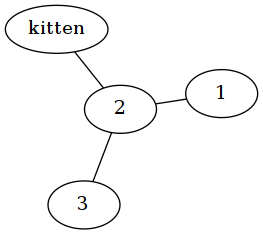

In [8]:
from IPython.display import Image
Image('a_graph.png')

Very much like NetworkX. Turns out that we can render DOT graphs to Notepad directly, assuming we have set up Matplotlib to render inline, with Networkx like so.

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

I am learning to insist myself to use the OOP, not the stateful Matplotlib interface.

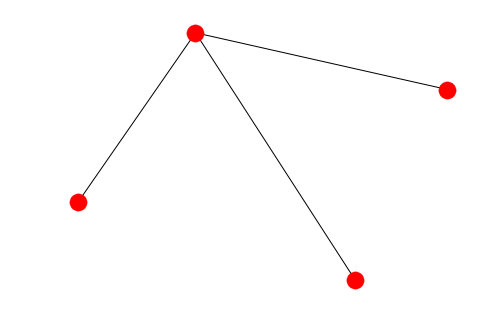

In [10]:
fig, ax = plt.subplots()
nx.draw(A, ax=ax)

Maybe there is a way to change default node and edge [attributes](https://graphviz.gitlab.io/_pages/doc/info/attrs.html) too (`graph_attr`, `node_attr`, `edge_attr` maybe), and we can set attributes while creating a graph. Let's see about editing node attributes...

In [11]:
for n in A.nodes():
    n.attr['shape'] = 'square'

for e in A.edges():
    e.attr['color'] = 'gray'

We can set them while adding them too, and recalculate layout.

In [12]:
A.add_node('snakie', color='green')
A.add_edges_from([['1', 'snakie'],
                  ['kitten', 'snakie']],
                  color='green')
A.layout()

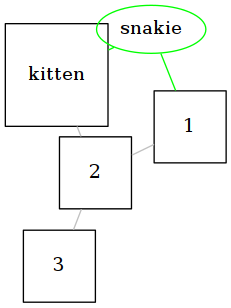

In [13]:
A.draw('a_graph_with_viz.png')
Image('a_graph_with_viz.png')

## Record structures

Let's see how these *record* constructions would be made in Python. They are nodes, where the `label` attributes is given in a small language of its own, with `|`, `{` and `}` to split things up. For example in DOT

     digraph structs {
       node [shape=record];
       struct1 [label="<f0> left|<f1> mid&#92; dle|<f2> right"];
       struct2 [label="<f0> one|<f1> two"];
       struct3 [label="hello&#92;nworld |{ b |{c|<here> d|e}| f}| g | h"];
       struct1:f1 -> struct2:f0;
       struct1:f2 -> struct3:here;
     }

Is a description for this graph 
     
![](https://graphviz.gitlab.io/_pages/doc/info/record.gif)

Creating it as a `AGraph` from a string

In [61]:
R = pgv.AGraph(string="""digraph structs {
       node [shape=record];
       struct1 [label="<f0> left|<f1> mid&#92; dle|<f2> right"];
       struct2 [label="<f0> one|<f1> two"];
       struct3 [label="hello&#92;nworld |{ b |{c|<here> d|e}| f}| g | h"];
       struct1:f1 -> struct2:f0;
       struct1:f2 -> struct3:here;
     }""")

In [57]:
print(R)

digraph structs {
	node [shape=record];
	struct1	 [label="<f0> left|<f1> mid&#92; dle|<f2> right"];
	struct2	 [label="<f0> one|<f1> two"];
	struct1:f1 -> struct2:f0;
	struct3	 [label="hello&#92;nworld |{ b |{c|<here> d|e}| f}| g | h"];
	struct1:f2 -> struct3:here;
}



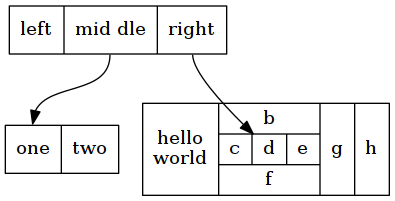

In [68]:
R.draw('a_recordlayout_example.png', prog='dot')
Image('a_recordlayout_example.png')

Now, to reproduce it closer to Python... Is this madness? Should these just be described in DOT?

In [80]:
S = pgv.AGraph(directed=True, strict=False)
S.add_node('node', shape='record')
S.add_node('struct1', label='<f0> left|<f1> mid&#92; dle|<f2> right')
S.add_node('struct2', label='<f0> one|<f1> two')
S.add_node('struct3', label='hello&#92;nworld|{ b | {c|<here> d|e}| f}| g | h')
S.add_edge('struct:f1', 'struct2:f0')
S.add_edge('struct:f2', 'struct3:here')

print(S)
S.layout(prog='dot')

digraph {
	node [label="\N"];
	"node"	 [shape=record];
	struct1	 [label="<f0> left|<f1> mid&#92; dle|<f2> right"];
	struct2	 [label="<f0> one|<f1> two"];
	struct3	 [label="hello&#92;nworld|{ b | {c|<here> d|e}| f}| g | h"];
	"struct:f1" -> "struct2:f0";
	"struct:f2" -> "struct3:here";
}



In [78]:
assert R.string() == S.string(), "Nope it's not there"

AssertionError: Nope it's not there

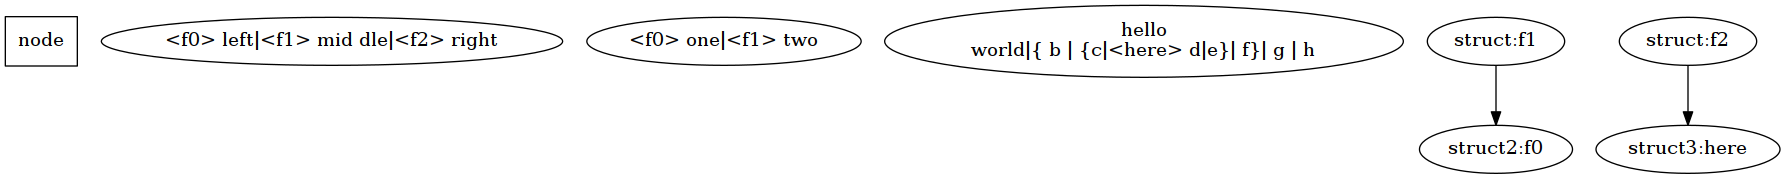

In [73]:
S.draw('a_recordlayout.png', prog='dot')
Image('a_recordlayout.png')